# COS80027 Machine Learning
## Assignment 2, 2025, Semester 1
## Student Details:
* Name: Harrison Stefanidis
* Student ID: 105260443
* Email: 105260443@student.swin.edu.au
* Submission Date: 17/05/2025
* TuteLab Class: Friday 2:30pm-4:30pm

## Task 1 - Data Loading and Data Exploration

### Sub-Task 1.1 - Import Files and Data Loading

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("customers.csv")

### Sub-Task 1.2 - Clean Dataset

In [6]:
from sklearn.preprocessing import LabelEncoder

# Drop 'CustomerID' and encode 'Gender'
df_cleaned = df.drop(columns=['CustomerID']).copy()
df_cleaned['Gender'] = LabelEncoder().fit_transform(df_cleaned['Gender'])  # Female: 0, Male: 1

### Sub-Task 1.3 - Display Descriptive Statistics

In [8]:
# Display descriptive statistics
print("Descriptive Statistics:\n", df_cleaned.describe())

Descriptive Statistics:
            Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


### Sub-Task 1.4 - Exploratory Analysis of Dataset

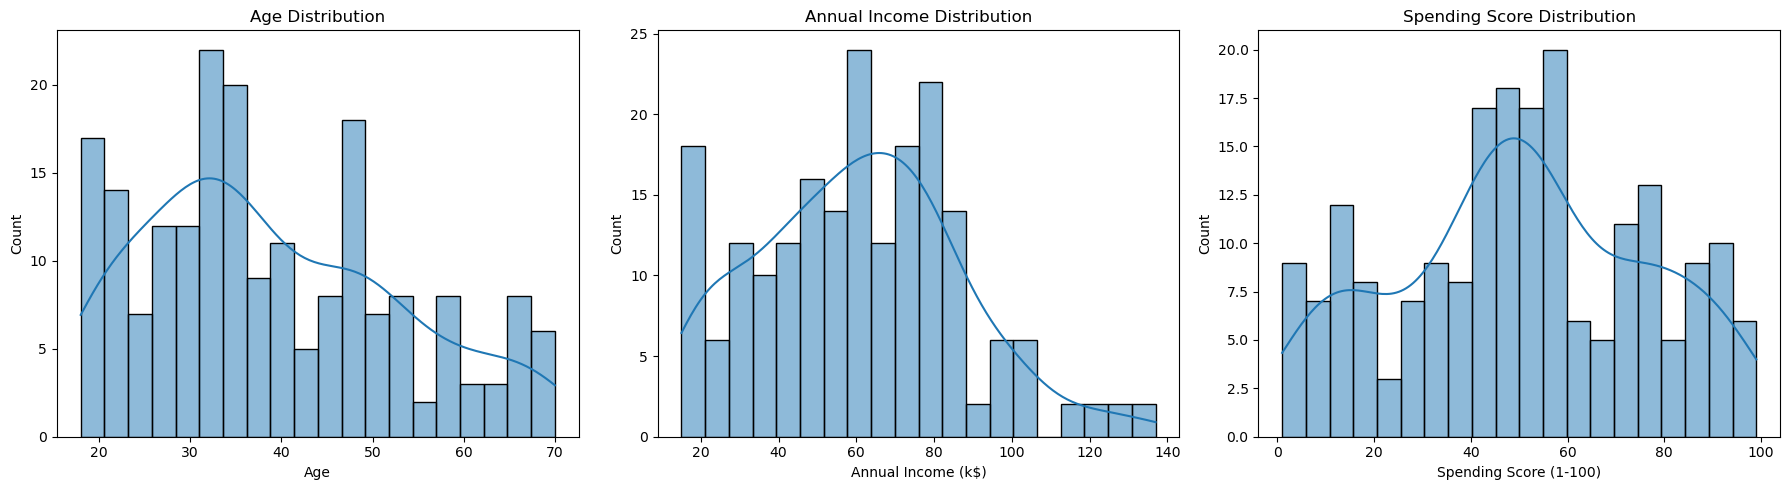

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(df_cleaned['Annual Income (k$)'], bins=20, kde=True, ax=axes[1]).set_title('Annual Income Distribution')
sns.histplot(df_cleaned['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2]).set_title('Spending Score Distribution')
plt.tight_layout()
plt.show()

### Sub-Task 1.5 - Outlier Detection

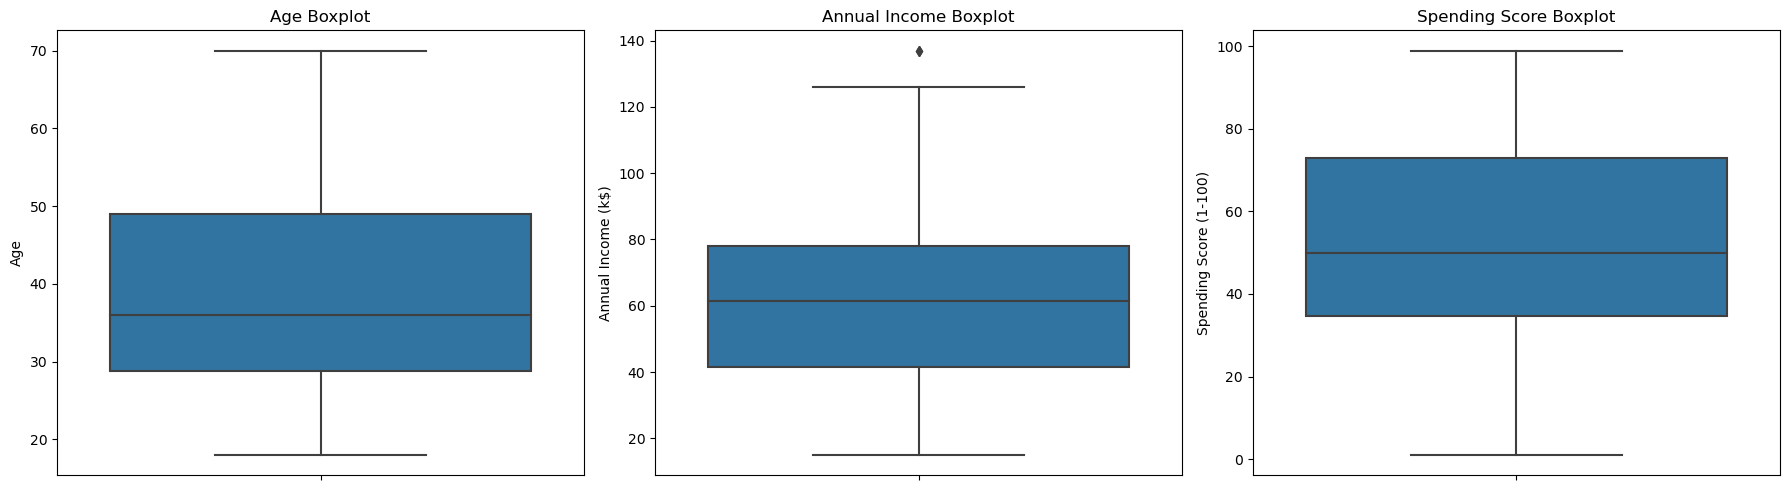

In [12]:
# Boxplots for outlier detection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df_cleaned['Age'], ax=axes[0]).set_title('Age Boxplot')
sns.boxplot(y=df_cleaned['Annual Income (k$)'], ax=axes[1]).set_title('Annual Income Boxplot')
sns.boxplot(y=df_cleaned['Spending Score (1-100)'], ax=axes[2]).set_title('Spending Score Boxplot')
plt.tight_layout()
plt.show()

### Sub-Task 1.6 - Correlation Analysis

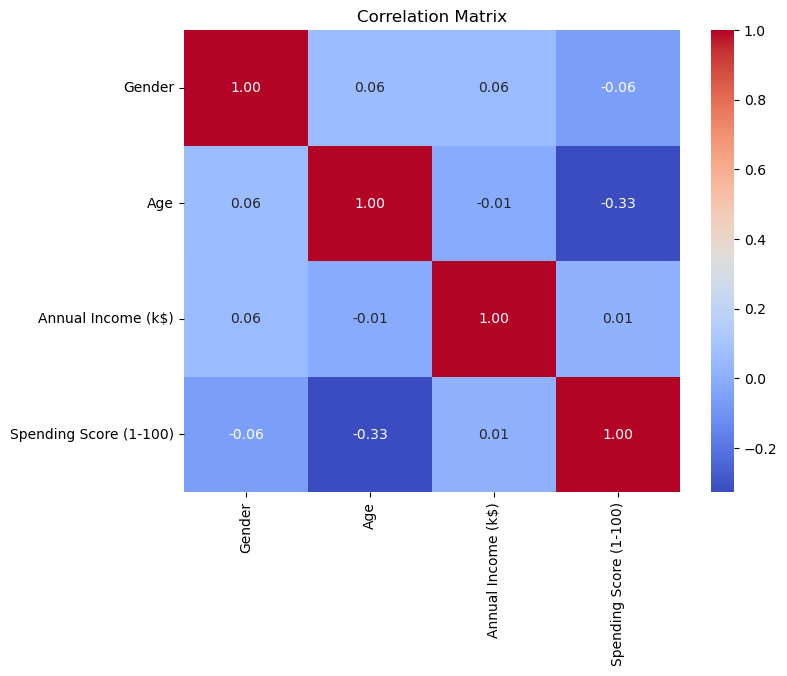

In [14]:
# Correlation heatmap creation
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Sub-Task 1.7 - Cleaned Data Preview

In [16]:
# Display cleaned data preview
df_cleaned.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Sub-Task 1.8 - PCA (Dimensionality Reduction)

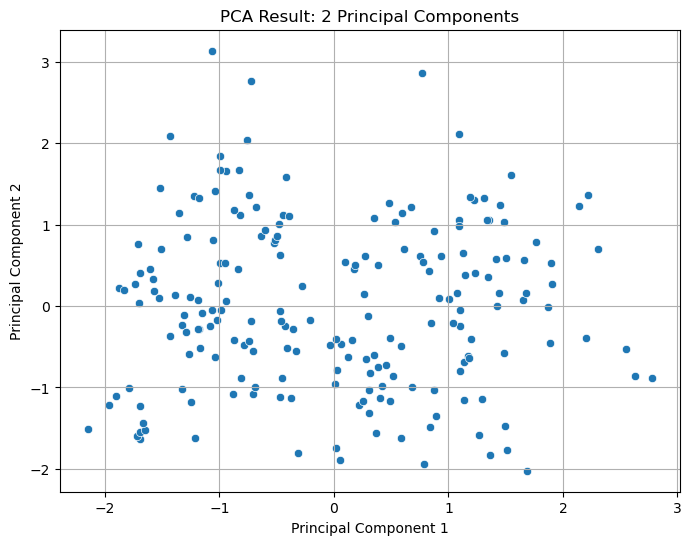

Explained variance ratio by each component:
PC1: 0.3369
PC2: 0.2623
Total variance explained by PC1 and PC2: 0.5992


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
features = df_cleaned.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Result: 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Show explained variance
print("Explained variance ratio by each component:")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.4f}")

print(f"Total variance explained by PC1 and PC2: {pca.explained_variance_ratio_.sum():.4f}")

## Task 2 - Clustering

### Sub-Task 2.1 - Find Optimal K for K-Means Clustering

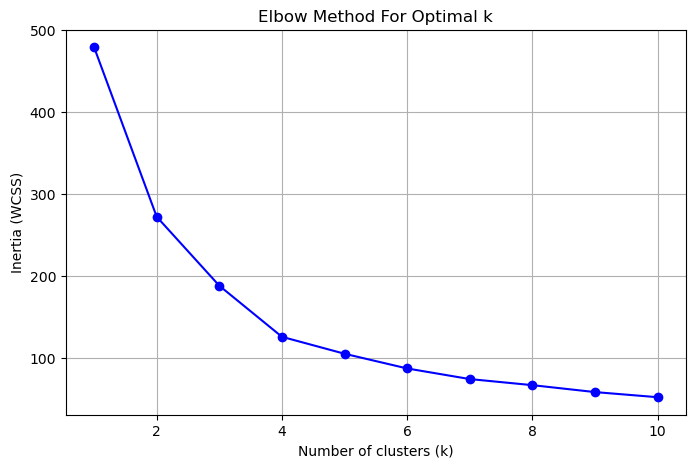

In [21]:
from sklearn.cluster import KMeans

# Elbow Method – find optimal k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

### Sub-Task 2.2 - Silhouette Scores for K-Means Clustering

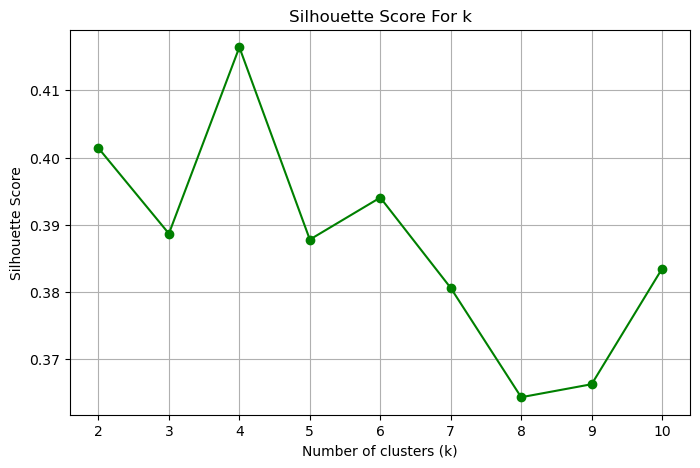

In [23]:
from sklearn.metrics import silhouette_score

# Silhouette Score for k=2 to k=10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For k')
plt.grid(True)
plt.show()

### Sub-Task 2.3 - Final Optimal K-Means Cluster

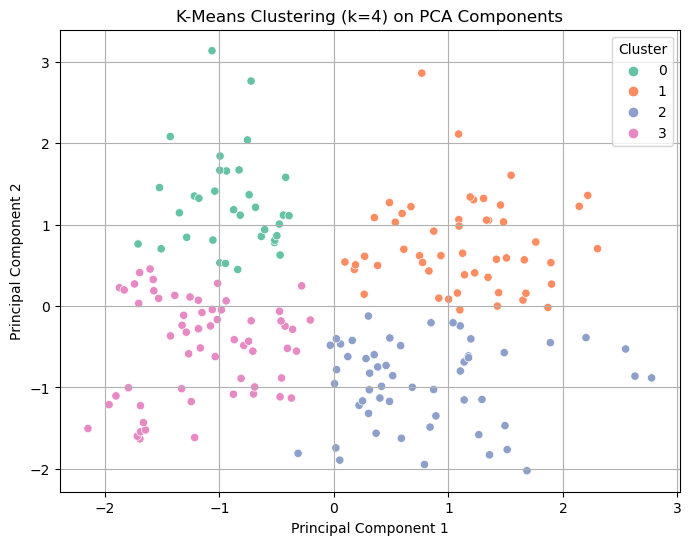

In [25]:
# Final K-means clustering with best k
optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df['Cluster'] = final_kmeans.fit_predict(pca_df)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df)
plt.title(f'K-Means Clustering (k={optimal_k}) on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Sub-Task 2.4 - Find Optimal Eps for DBSCAN Clustering

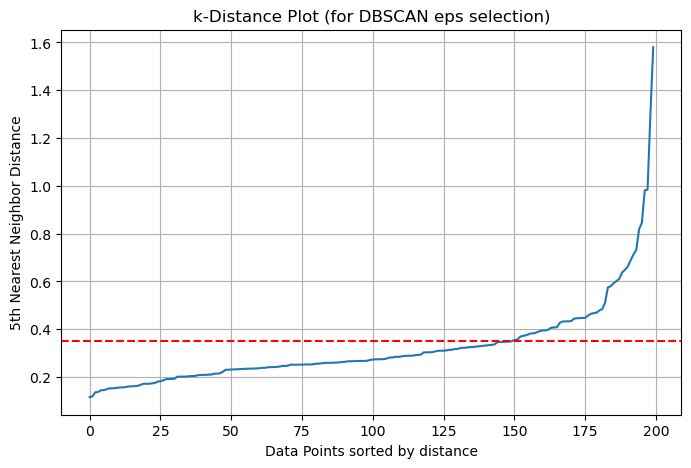

In [27]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Use Nearest Neighbors to find optimal eps using k-distance plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_df[['PC1', 'PC2']])
distances, indices = neighbors_fit.kneighbors(pca_df[['PC1', 'PC2']])

# Sort and plot k-distance to find "elbow"
distance_values = np.sort(distances[:, 4])  # 5th nearest neighbor
plt.figure(figsize=(8, 5))
plt.plot(distance_values)
plt.axhline(y=0.35, color='r', linestyle='--')
plt.title('k-Distance Plot (for DBSCAN eps selection)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

### Sub-Task 2.5 - Apply DBSCAN and Visualise Final Optimal Clustering Results

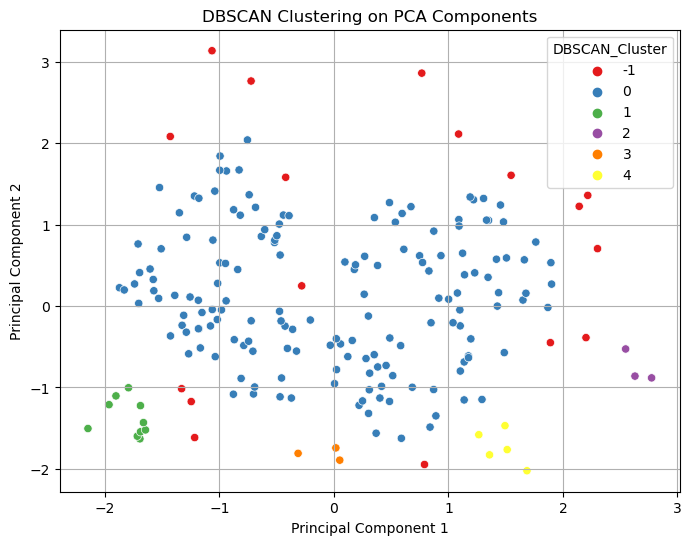

DBSCAN cluster counts:
DBSCAN_Cluster
 0    162
-1     17
 1     10
 4      5
 3      3
 2      3
Name: count, dtype: int64


In [29]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=3)
dbscan_labels = dbscan.fit_predict(pca_df[['PC1', 'PC2']])

# Add DBSCAN results to DataFrame
pca_df['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='Set1', data=pca_df, legend='full')
plt.title('DBSCAN Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Count points per cluster
print("DBSCAN cluster counts:")
print(pca_df['DBSCAN_Cluster'].value_counts())

### Sub-Task 2.6 - Comparing Models to Decide Best Clustering Approach

In [31]:
# Recalculate silhouette score for K-Means
kmeans_score = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])

# Calculate silhouette score for DBSCAN, excluding noise
dbscan_masked = pca_df[pca_df['DBSCAN_Cluster'] != -1]
dbscan_score = silhouette_score(dbscan_masked[['PC1', 'PC2']], dbscan_masked['DBSCAN_Cluster'])

# Define cluster and outlier statistics
kmeans_clusters = pca_df['Cluster'].nunique()
dbscan_clusters = dbscan_masked['DBSCAN_Cluster'].nunique()
dbscan_outliers = (pca_df['DBSCAN_Cluster'] == -1).sum()

# Print comparison summary
print("=== Clustering Performance Comparison ===\n")

print("K-Means Clustering:")
print(f"- Number of clusters: {kmeans_clusters}")
print(f"- Silhouette Score: {kmeans_score:.4f}\n")

print("DBSCAN Clustering:")
print(f"- Epsilon: 0.35")
print(f"- Min samples: 3")
print(f"- Silhouette Score (excluding noise): {dbscan_score:.4f}")
print(f"- Number of clusters (excluding noise): {dbscan_clusters}")
print(f"- Number of outliers (noise points): {dbscan_outliers}\n")

print("=== Optimal Method Summary ===\n")
print(f"K-Means achieved a higher silhouette score ({kmeans_score:.4f}) indicating stronger and more distinct clusters.")
print("DBSCAN identified some outliers but its clusters were less compact and had lower cohesion.")
print("Since the goal is to segment customer behavior into clear groups, K-Means is the more suitable model for this dataset.")

=== Clustering Performance Comparison ===

K-Means Clustering:
- Number of clusters: 4
- Silhouette Score: 0.4164

DBSCAN Clustering:
- Epsilon: 0.35
- Min samples: 3
- Silhouette Score (excluding noise): 0.0875
- Number of clusters (excluding noise): 5
- Number of outliers (noise points): 17

=== Optimal Method Summary ===

K-Means achieved a higher silhouette score (0.4164) indicating stronger and more distinct clusters.
DBSCAN identified some outliers but its clusters were less compact and had lower cohesion.
Since the goal is to segment customer behavior into clear groups, K-Means is the more suitable model for this dataset.
